# **Handling missing data**

## **How you can handle missing data ???**

- By removing the entire row of the missing cell
    - also leads to the loss of additional cell data
- By imputing them 
    1. Univariate type
        - Depends on wheather the data is numerical or categorical
        - if numerical, can fill with mean, random num, end of distribution value
        - if categorical, can fill with mode, most frequent value
    2. Multivariate type
        - Two types
            - KNN imputer
            - Iterative imputer
            - MICE


## **CCA**
- CCA (complete case analysis) also called 'list-wise-deletion' of cases, consists in discarding observations where values variables are missing.
- CCA means literally analyzing only those observations for which there is info in all of the variables in the dataset.

### **Assumption for CCA**
- Data is missing completely at random (random implies data is missing at random places), its called **Missing Completely At Random (MCAR)**


#### **Advantages of Complete Case Analysis (CCA)**

- Very simple to implement  
  CCA (listwise deletion) just drops any row with missing values on the analysis variables, so it is easy to code, easy to explain, and is the default in many software packages.

- Uses standard complete‑data methods  
  After incomplete rows are removed, all usual models (regression, ANOVA, ML algorithms) can be applied without modification, which keeps analysis pipelines straightforward.

- Unbiased under MCAR  
  If data are Missing Completely At Random (MCAR), complete case analysis yields unbiased estimates of means, variances, and regression coefficients for the reduced sample.

- Preserves variable distribution. If data is MCAR, then the distribution of the variable of the reduced dataset should match the distribution in the original dataset.


#### **Disadvantages of Complete Case Analysis (CCA)**

- Loss of data and power  
  Dropping all rows with any missing value can remove a large fraction of the dataset, which reduces effective sample size and statistical power, especially when many variables are involved.

- Potentially serious bias  
  If missingness is not MCAR (for example, depends on the outcome or predictors), CCA can produce biased estimates and misleading conclusions because the analyzed subset is no longer representative.

- Inconsistent samples across analyses  
  Different models using different variable sets may each be based on different subsets of complete cases, making it hard to compare results and generalize findings.

- Inefficient use of available information  
  CCA discards partially observed rows that still contain useful information, whereas modern methods like multiple imputation or model‑based approaches can exploit these incomplete records.

- When using our models in production, the model will not know how to handle missing data

### **When to use ???**
- In case of MCAR
- In case of only 5% of data is missing, not more than that (generally used)



In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('data_science_job.csv')
df.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0


In [ ]:
print(df.shape)
print(f"\nThe missing data percentage is : \n\n{df.isna().mean()*100}")
# so we will be applying CCA where total number of missing data is less than 5%

(19158, 13)

The missing data percentage is : 

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64


In [ ]:
cols = [i for i in df.columns 
        if df[i].isna().mean() < 0.05 and df[i].isna().mean() > 0]
print(f"Columns less than 5% missing value are {cols}")
print(f"What percentage of data i will be left with after removing the rows of missing values : \n \
      {(len(df[cols].dropna()) / len(df))*100}")


# dropping the rows of the missing data
new_df = df[cols].dropna()
print(new_df.shape)


Columns less than 5% missing value are ['city_development_index', 'enrolled_university', 'education_level', 'experience', 'training_hours']
What percentage of data i will be left with after removing the rows of missing values : 
       89.68577095730244
(17182, 5)


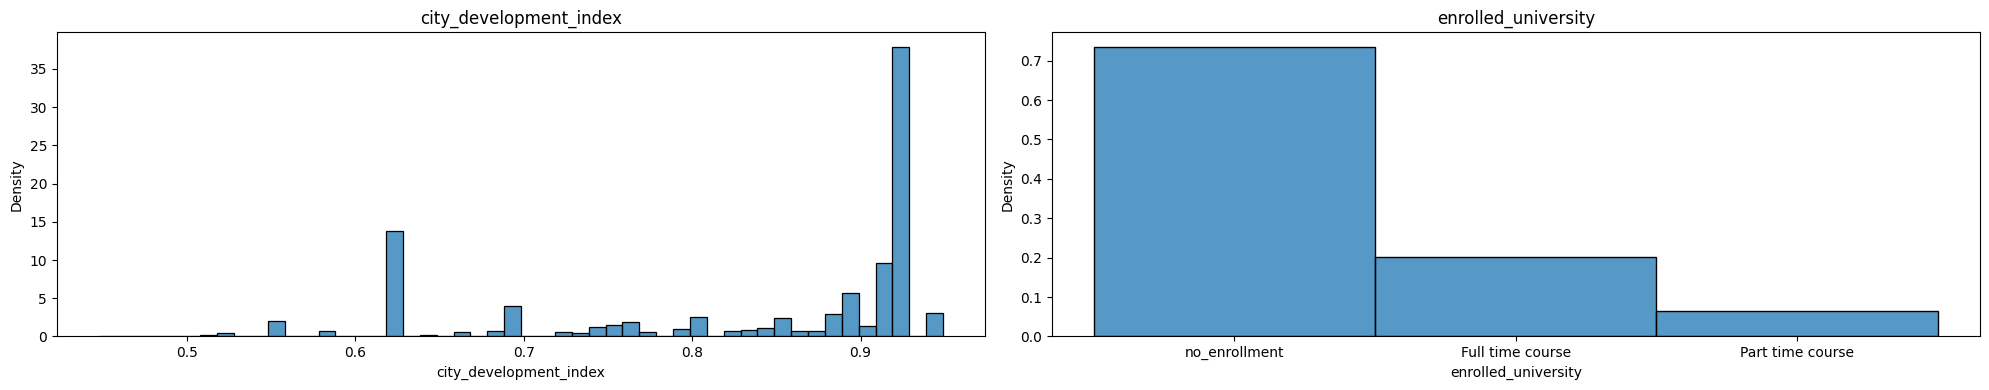

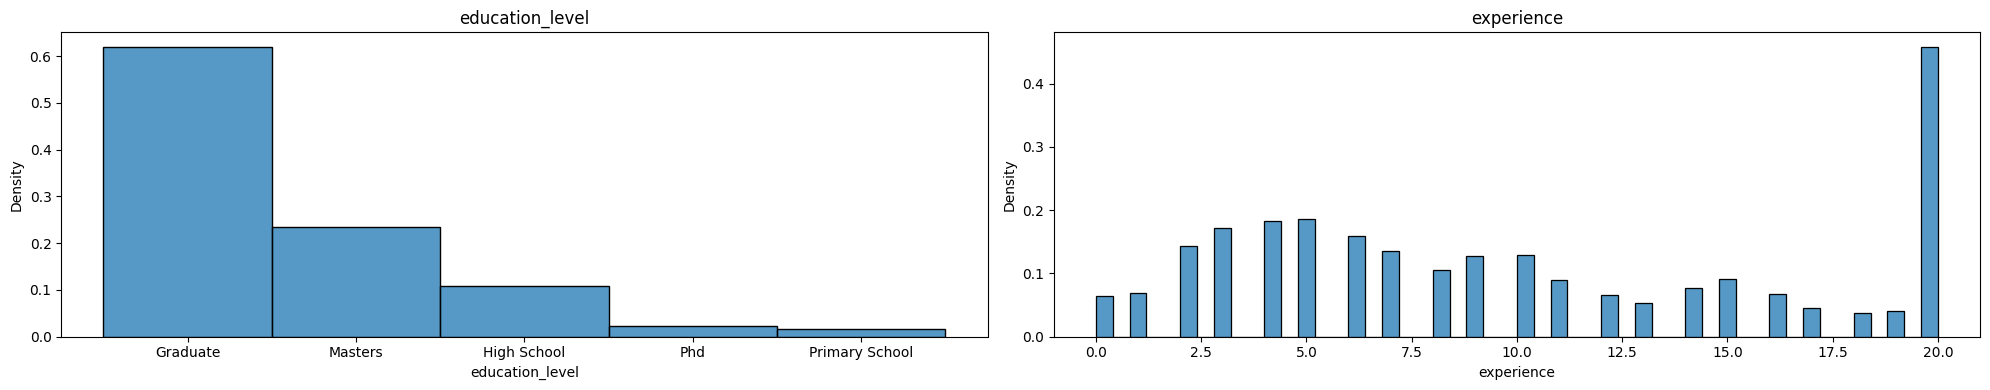

In [ ]:
# Plotting the histogram of the new dataset
a = new_df.columns
for i in range(0, len(a)-1, 2):  # step by 2: (0,1), (2,3), ...
    plt.figure(figsize=(20, 4))

    # Left subplot: column i
    plt.subplot(1, 2, 1)
    sns.histplot(new_df[cols[i]], bins=50, stat='density')
    plt.title(a[i])

    # Right subplot: column i+1
    plt.subplot(1, 2, 2)
    sns.histplot(new_df[cols[i + 1]], bins=50, stat='density')
    plt.title(a[i+1])

    plt.tight_layout()
    plt.show()
